<a href="https://colab.research.google.com/github/gmehra123/PORTFOLIO/blob/main/Testing_notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural networks can replicate any function part 2 !!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch

In [3]:
X = torch.rand(size=(10000,2))
# Creating complex non linear dependent variable
y = torch.exp(X[:,0]) + X[:,1]**2+torch.sin(X[:,1])

In [4]:
y=y.unsqueeze(dim=1)

In [5]:
y.shape

torch.Size([10000, 1])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
# Creating the model
class MultiVarModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.ll1 = nn.Linear(in_features=2,out_features=8)
    self.ac1 = nn.ReLU()
    self.ll2 = nn.Linear(in_features=8,out_features=16)
    self.ac2 = nn.ReLU()
    self.ll3 = nn.Linear(in_features=16,out_features=16)
    self.ac3 = nn.ReLU()
    self.ll4 = nn.Linear(in_features=16,out_features=4)
    self.ac4 = nn.ReLU()
    self.output = nn.Linear(in_features=4,out_features=1)

  def forward(self,X):
    X = self.ll1(X)
    X = self.ac1(X)
    X = self.ll2(X)
    X = self.ac2(X)
    X = self.ll3(X)
    X = self.ac3(X)
    X = self.ll4(X)
    X = self.ac4(X)
    X = self.output(X)
    return X

In [24]:
model = MultiVarModel()

In [25]:
# Run untrained model
with torch.inference_mode():
  y_pred_untune = model(X_test)

In [26]:
loss_fn = nn.L1Loss()
loss_fn(y_pred_untune,y_test).item()

2.87568998336792

In [27]:
y_pred_untune_np = y_pred_untune.numpy()
y_test1 = y_test.numpy()
y_pred_untune_np.shape,y_test1.shape

((2000, 1), (2000, 1))

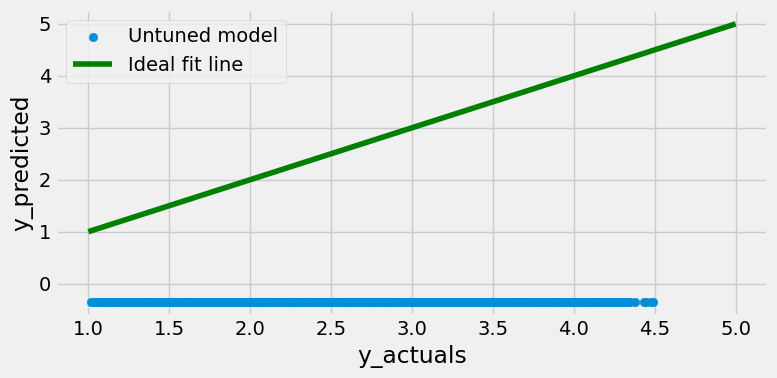

In [28]:
plt.style.use('fivethirtyeight')
x_a = np.linspace (1,5)
y_a = x_a
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(y_test1,y_pred_untune,label="Untuned model")
ax.plot(x_a,y_a,label="Ideal fit line",color='green',linewidth=4)
ax.set_xlabel('y_actuals')
ax.set_ylabel('y_predicted')
plt.legend()
plt.tight_layout()
plt.savefig('UnFitted_model.jpg')
plt.show()

### Define loss fn and optimizer

In [29]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params = model.parameters(),lr=0.001)

In [43]:
epochs = 100
for epoch in range(epochs):
  #1. Fwd pass
  y_pred_tr = model(X_train)

  #2. Calculate the loss
  loss_tr = loss_fn(y_pred_tr,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. bck prop
  loss_tr.backward()

  #5 Optimizer step
  optimizer.step()

  # Put model in evaluation mode
  model.eval()
  with torch.inference_mode():
    y_pred_test = model(X_test)
    loss_test = loss_fn(y_pred_test,y_test)

  if epoch % 10 ==0:
    print(f"epoch: {epoch} | loss_train: {loss_tr} | Loss_test: {loss_test}")

epoch: 0 | loss_train: 0.03807920590043068 | Loss_test: 0.03850053995847702
epoch: 10 | loss_train: 0.03676188364624977 | Loss_test: 0.03714962676167488
epoch: 20 | loss_train: 0.03541707620024681 | Loss_test: 0.035772595554590225
epoch: 30 | loss_train: 0.03401918336749077 | Loss_test: 0.0343000590801239
epoch: 40 | loss_train: 0.03255040571093559 | Loss_test: 0.032769691199064255
epoch: 50 | loss_train: 0.03097951039671898 | Loss_test: 0.031094733625650406
epoch: 60 | loss_train: 0.029308347031474113 | Loss_test: 0.0293668732047081
epoch: 70 | loss_train: 0.027579212561249733 | Loss_test: 0.02765410766005516
epoch: 80 | loss_train: 0.026055393740534782 | Loss_test: 0.02601657621562481
epoch: 90 | loss_train: 0.02465854398906231 | Loss_test: 0.0245455764234066


In [44]:
# Run untrained model
with torch.inference_mode():
  y_pred_tune = model(X_test)

In [45]:
y_pred_tune_np = y_pred_tune.numpy()

In [46]:
y_pred_tr,y_train

(tensor([[1.4769],
         [2.0492],
         [2.4672],
         ...,
         [1.5320],
         [2.8417],
         [1.5262]], grad_fn=<AddmmBackward0>),
 tensor([[1.4707],
         [2.0874],
         [2.4256],
         ...,
         [1.5381],
         [2.8265],
         [1.5658]]))

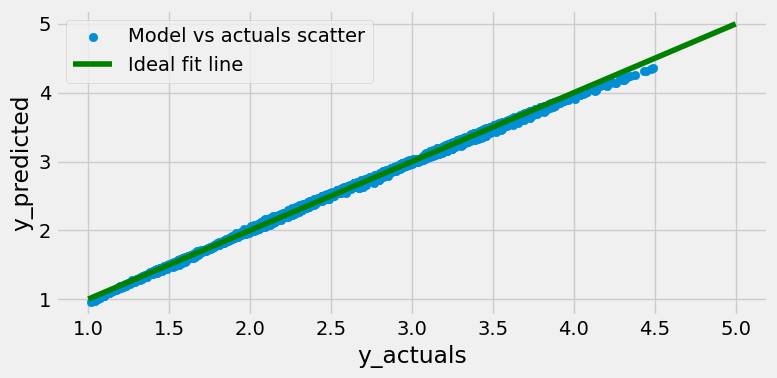

In [47]:
plt.style.use('fivethirtyeight')
x_a = np.linspace (1,5)
y_a = x_a
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(y_test1,y_pred_tune_np,label="Model vs actuals scatter")
ax.plot(x_a,y_a,label="Ideal fit line",color='green',linewidth=4)
ax.set_xlabel('y_actuals')
ax.set_ylabel('y_predicted')
plt.legend()
plt.tight_layout()
plt.savefig('Fitted_model.jpg')
plt.show()

In [48]:
AE = np.abs(y_test1)

In [49]:
# Saving the model
torch.save(model.state_dict(),f='drive/MyDrive/models/model_non_linear.pth')

In [50]:
import pandas as pd
pred_vs_actuals_df = pd.DataFrame({'Actuals':y_test1.squeeze(),'Predictions':y_pred_tune.squeeze()})

In [51]:
pred_vs_actuals_df['error'] = np.abs(pred_vs_actuals_df['Actuals'] - pred_vs_actuals_df['Predictions'])/pred_vs_actuals_df['Actuals']

In [52]:
# top 10 best predictions
pred_vs_actuals_df.sort_values(by='error').head(10)

,Actuals,Predictions,error
401,3.002640,3.002667,0.000009
1869,2.790586,2.790556,0.000011
502,2.400928,2.400992,0.000027
1276,3.698372,3.698483,0.000030
283,3.715266,3.715149,0.000031
673,2.366010,2.366100,0.000038
1599,1.353959,1.354017,0.000043
1865,3.004163,3.004294,0.000043
1721,2.787524,2.787668,0.000052
1480,1.465943,1.465860,0.000057


In [53]:
# Worst predictions
pred_vs_actuals_df.sort_values(by='error',ascending=False).head(10)

,Actuals,Predictions,error
1145,1.041878,0.979421,0.059946
1175,1.018383,0.962505,0.054870
71,1.063031,1.006703,0.052988
1695,1.038053,0.983283,0.052762
595,1.048179,0.994745,0.050978
1916,1.073444,1.022112,0.047820
630,1.096641,1.045936,0.046237
1373,1.095803,1.045797,0.045634
918,1.095467,1.045620,0.045503
1973,1.567644,1.507264,0.038516
